## Table of Contents
* <a href='#Extracting-the-data'>Extracting the data</a>
* <a href='#Creating-a-line-chart'>Creating a line chart</a>
* <a href='#Observations-from-visualization'>Observations from visualization</a>

# Extracting the data
  * Checking if my city exist in dataset

To check if dataset have my city (Tokyo, Japan) next SQL query was used:
```SQL
--Check if my city exist in dataset
SELECT city FROM city_list
WHERE lower(country) = 'japan'
ORDER BY city
```
Because I was not sure about formating of country column I used `WHERE lower(country) = 'japan'` to make request case insensitive.

Query result:
![CV.jpeg](attachment:CV.jpeg)

Now, once we confirmed that Tokyo data exist, we can extract average temperature historical data.

  * Extracting temperature for my city and global from database

To extract historical dataset next SQL query was used:
```SQL
--Generate dataset
SELECT c.year, c.avg_temp tokyo_avg, g.avg_temp global_avg
FROM city_data c
JOIN global_data g
ON c.year = g.year
WHERE c.city = 'Tokyo'
ORDER BY year
```
Query result:
![DS.JPG](attachment:DS.JPG)

  * Downloading dataset from SQL Workspace to local.

By default file downloaded to local as 'results.csv'.

# Creating a line chart
To operate data, make analysis and visualization I choose Python 3.7 Anaconda distribution with Jupyter Notebook as Development Environment. Notebook, Anaconda environment YAML file and requirements can be found in [my GitHub repository](https://github.com/Wildbird74/explore_weather_trends).
  * Importing data from CSV file

To import data from CSV file Pandas library was used. Column `year` was converted to dataframe index.

In [1]:
import pandas as pd

df = pd.read_csv('results.csv',index_col='year')
df.head()

,tokyo_avg,global_avg
year,,
1845,11.95,7.85
1846,12.40,8.55
1847,12.21,8.09
1848,12.14,7.98
1849,12.14,7.98


  * Calculate moving averages

To calculate moving average I used functionality of python Pandas library rolling.mean(). Was created new dataframe r_df (which stands for rolling_dataframe). As a window for rolling function I choose value of 11, as this is value used by JMA (Japanese Meteorology Agency).

See capture from JMA Tokyo historical analysis report.
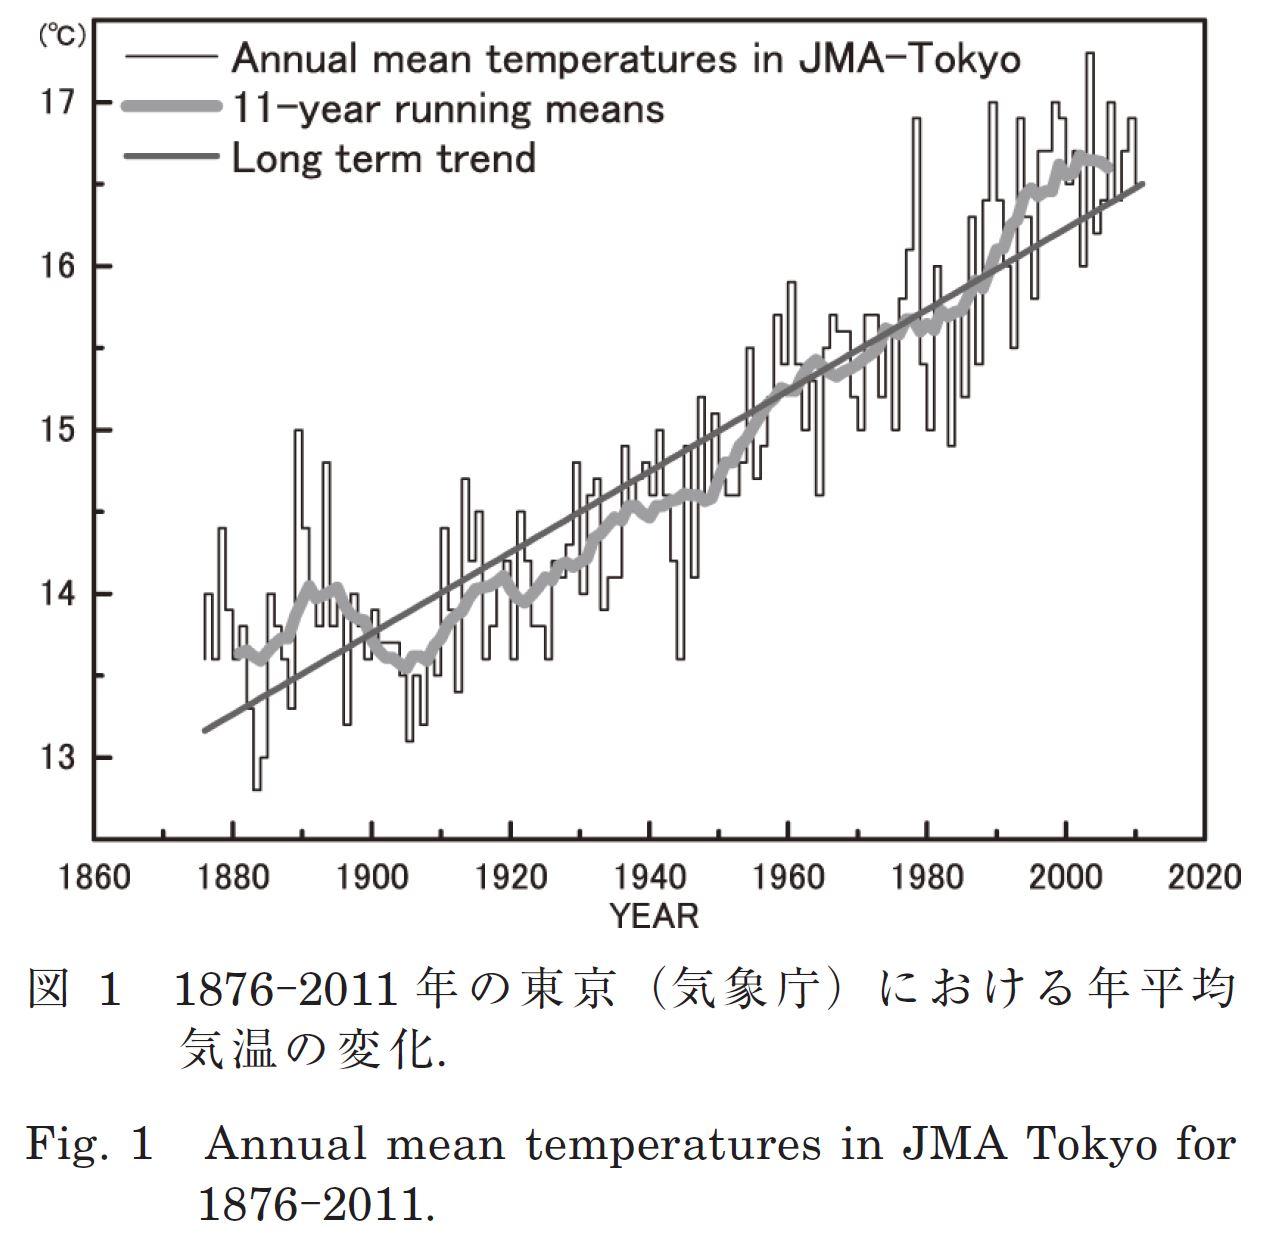

In [2]:
r_df = df.rolling(11).mean()
r_df[5:15]

,tokyo_avg,global_avg
year,,
1850,NaN,NaN
1851,NaN,NaN
1852,NaN,NaN
1853,NaN,NaN
1854,NaN,NaN
1855,12.063636,8.090000
1856,12.073636,8.103636
1857,12.031818,8.031818
1858,12.033636,8.032727


  * Build moving average visualization

For visualization I used Pandas library (which is build on top of Matplotlib). To enable graph to be shown in Jupyter Notebook directly I used `%matplotlib inline`.
X axis pick-up dataframe 

Text(0, 0.5, 'Moving Average Temperatue')

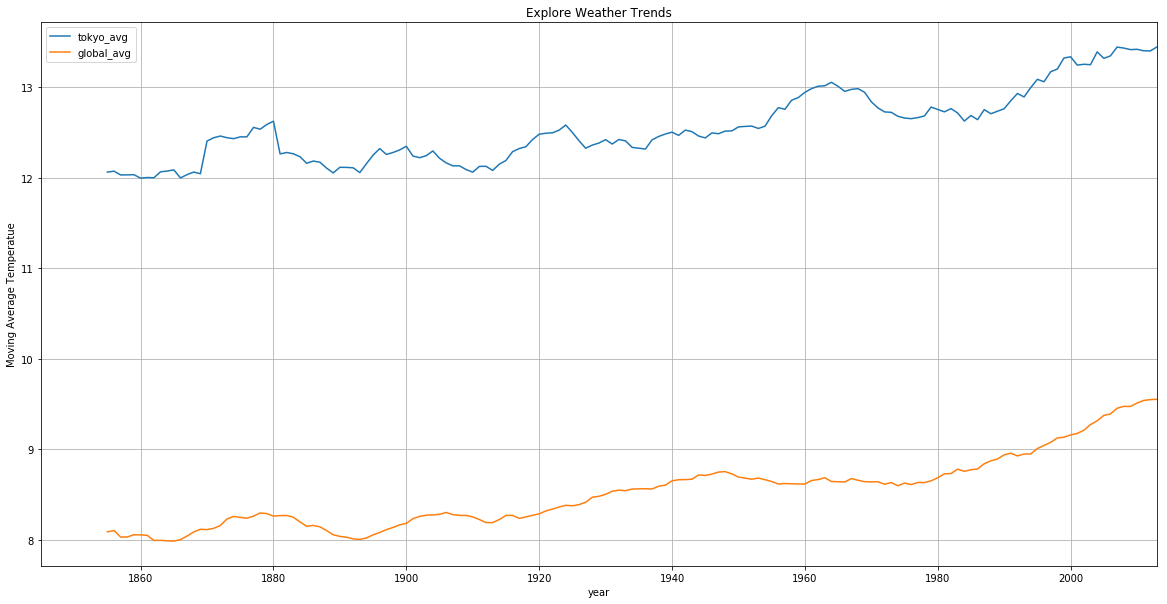

In [3]:
%matplotlib inline

ax = r_df.plot(title='Explore Weather Trends', grid=True, figsize=(20, 10))
ax.set_ylabel('Moving Average Temperatue')

# Observations from visualization
  * Global moving average and Tokyo moving average have the same trend

There is significant correlation between Tokyo temperature and Global temperature (Pearson coefficient is 0.596501). And there is almost equal coefficient that multiply the predictor variable (year) for linear regression lines (Tokyo 0.0077 vs. Global 0.0081).
To calculate linear regression coefficients NumPy library was used.

In [4]:
df.corr(method='pearson')

,tokyo_avg,global_avg
tokyo_avg,1.000000,0.596501
global_avg,0.596501,1.000000


In [5]:
import numpy as np

lm_tokyo = np.polyfit(df.index, df.tokyo_avg, 1)
print(lm_tokyo)
lm_global = np.polyfit(df.index, df.global_avg, 1)
print(lm_global)

[ 0.00769146 -2.27109129]
[ 0.00809664 -7.07421478]


  * Global moving average line is much more smooth than Tokyo moving average line

  * Difference between temperature in Tokyo and Global almost constant

Difference is vary between 2.89 in 1981 and 7.92 in 1870, but 25 to 75 percentile is in range of 3.74 to 4.24, where 50 percentile equal to Mean = 4.02, which we can count as constant.

In [6]:
df_diff = df
df_diff['diff'] = df_diff['tokyo_avg'] - df_diff['global_avg']
df_diff.describe()

,tokyo_avg,global_avg,diff
count,169.000000,169.000000,169.000000
mean,12.565740,8.544201,4.021538
std,0.649692,0.461310,0.526643
min,11.180000,7.560000,2.890000
25%,12.140000,8.180000,3.740000
50%,12.450000,8.530000,4.020000
75%,12.920000,8.760000,4.240000
max,16.120000,9.730000,7.920000


In [7]:
df_diff.loc[df_diff['diff'].idxmin()]

tokyo_avg     12.06
global_avg     9.17
diff           2.89
Name: 1981, dtype: float64

In [8]:
df_diff.loc[df_diff['diff'].idxmax()]

tokyo_avg     16.12
global_avg     8.20
diff           7.92
Name: 1870, dtype: float64

  * There is a spike in Tokyo moving average data starting from 1870 year

As we found in previous step in 1870 there was abnormaly high average temperature in Tokyo (16.12 degrees of celsius). This makes moving average for 1870 to 1880 (11 years window) higher.

In [9]:
df.loc[1865:1875]

,tokyo_avg,global_avg,diff
year,,,
1865,12.39,8.18,4.21
1866,11.58,8.29,3.29
1867,12.46,8.44,4.02
1868,12.25,8.25,4.00
1869,12.03,8.43,3.60
1870,16.12,8.20,7.92
1871,12.12,8.12,4.00
1872,12.00,8.19,3.81
1873,11.53,8.35,3.18


In [10]:
r_df.loc[1865:1885]

,tokyo_avg,global_avg
year,,
1865,12.088182,7.987273
1866,11.999091,8.003636
1867,12.035455,8.043636
1868,12.063636,8.088182
1869,12.045455,8.118182
1870,12.406364,8.113636
1871,12.442727,8.128182
1872,12.461818,8.159091
1873,12.443636,8.230909
